#Assingment 1

In [14]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

## Part A

### Euclidean distance of two vectors

In [15]:
def euclidean_distance(a,b):
  """
    Calculates the Euclidean distance between two vectors 'a' and 'b'.

    Parameters:
    a : ndarray
        A numpy array representing the first vector.
    b : ndarray
        A numpy array representing the second vector.

    Returns:
    distance : float
        The Euclidean distance between vectors 'a' and 'b'.
  """
  return np.sqrt(np.sum((a - b)**2))

### Manhattan Distance of two vectors

In [16]:
def manhattan_distance(a,b):
  """
    Calculates the Manhattan distance between two vectors 'a' and 'b'.

    Parameters:
    a : ndarray
        A numpy array representing the first vector.
    b : ndarray
        A numpy array representing the second vector.

    Returns:
    distance : float
        The Manhattan distance between vectors 'a' and 'b'.
  """
  return np.sum(np.abs(a - b))

### Accuracy and generalization error of two vectors

In [17]:
def accuracy_generalization_error(predicted, actual):
  """
    Calculates the accuracy and generalization error based on predicted and actual labels.

    Parameters:
    predicted : ndarray
        A 1D numpy array containing predicted labels.
    actual : ndarray
        A 1D numpy array containing actual labels.

    Returns:
    accuracy : float
        The accuracy of the predictions.
    generalization_error : float
        The generalization error, calculated as (1 - accuracy).
  """
  # Count the number of correct predictions
  correct_predictions = np.sum(predicted == actual)
  # Calculate the total number of predictions
  total_predictions = predicted.shape[0]
  # Calculate accuracy
  accuracy = correct_predictions / total_predictions
  # Calculate generalization error
  generalization_error = 1 - accuracy

  return accuracy, generalization_error

### Precision, Recall and F1 score

In [18]:
def precision(y_pred,y_true):
  """
    Calculates precision based on predicted and actual labels.

    Parameters:
    y_pred : ndarray
        A 1D numpy array containing predicted labels.
    y_true : ndarray
        A 1D numpy array containing actual labels.

    Returns:
    precision : float
        The precision score.
  """
  # Count the number of true positive predictions
  true_positive = np.sum((y_true == 1) & (y_pred == 1))
  # Count the number of false positive predictions
  false_positive = np.sum((y_true == 0) & (y_pred == 1))
  # Handle the case where true positive and false positive are both zero
  if true_positive + false_positive == 0:
    return 0
  # Return precision
  return true_positive / (true_positive + false_positive)

In [19]:
def recall(y_pred, y_true):
  """
    Calculates recall based on predicted and actual labels.

    Parameters:
    y_pred : ndarray
        A 1D numpy array containing predicted labels.
    y_true : ndarray
        A 1D numpy array containing actual labels.

    Returns:
    recall : float
        The recall score.
  """
  true_positive = np.sum((y_true == 1) & (y_pred == 1))
  false_negative = np.sum((y_true == 1) & (y_pred == 0))

  if true_positive + false_negative == 0:
    return 0

  return true_positive / (true_positive + false_negative)

In [20]:
def f1_score(y_pred, y_true):
  """
    Calculates the F1 score based on predicted and actual labels.

    Parameters:
    y_pred : ndarray
        A 1D numpy array containing predicted labels.
    y_true : ndarray
        A 1D numpy array containing actual labels.

    Returns:
    f1 : float
        The F1 score.
  """
  # Calculate precision and recall using previously defined functions
  precision_val = precision(y_true, y_pred)
  recall_val = recall(y_true, y_pred)

  if precision_val + recall_val == 0:
    return 0

  # Calculate F1 score using the formula: 2 * (precision * recall) / (precision + recall)
  f1 = 2 * (precision_val * recall_val) / (precision_val + recall_val)
  return f1

### Confusion matrix of two vectors

In [21]:
def confusion_matrix(y_pred, y_true):
  """
    Calculates the confusion matrix based on predicted and actual labels.

    Parameters:
    y_pred : ndarray
        A 1D numpy array containing predicted labels.
    y_true : ndarray
        A 1D numpy array containing actual labels.

    Returns:
    cm : ndarray
        A 2x2 numpy array representing the confusion matrix.
  """
  # Count the number of true positive, false positive, false negative, and true negative predictions
  true_positive = np.sum((y_true == 1) & (y_pred == 1))
  false_positive = np.sum((y_true == 0) & (y_pred == 1))
  false_negative = np.sum((y_true == 1) & (y_pred == 0))
  true_negative = np.sum((y_true == 0) & (y_pred == 0))

  # Create the confusion matrix
  cm = np.array([[true_negative, false_positive],
                 [false_negative, true_positive]])

  return cm

### ROC

In [22]:
def generate_roc_curve(true_labels, predicted_probabilities):
    # Combine true labels and predicted probabilities into a list of tuples
    predictions = list(zip(true_labels, predicted_probabilities))

    # Sort predictions based on predicted probabilities in descending order
    sorted_predictions = sorted(predictions, key=lambda x: x[1], reverse=True)

    # Initialize variables for ROC curve
    true_positive_rate = []
    false_positive_rate = []
    total_positives = true_labels.count(1)
    total_negatives = true_labels.count(0)
    true_positives = false_positives = 0

    # Iterate through sorted predictions to calculate TPR and FPR
    for label, prob in sorted_predictions:
        if label == 1:
            true_positives += 1
        else:
            false_positives += 1

        tpr = true_positives / total_positives
        fpr = false_positives / total_negatives

        true_positive_rate.append(tpr)
        false_positive_rate.append(fpr)

    # Plot the ROC curve
    plt.plot(false_positive_rate, true_positive_rate, label='ROC Curve')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### AUC of ROC

In [23]:
def compute_auc(true_labels, predicted_probabilities):
    # Combine true labels and predicted probabilities into a list of tuples
    predictions = list(zip(true_labels, predicted_probabilities))

    # Sort predictions based on predicted probabilities in descending order
    sorted_predictions = sorted(predictions, key=lambda x: x[1], reverse=True)

    # Initialize variables for AUC calculation
    auc = 0.0
    total_positives = true_labels.count(1)
    total_negatives = true_labels.count(0)
    true_positives = false_positives = 0

    # Iterate through sorted predictions to calculate AUC
    for label, prob in sorted_predictions:
        if label == 1:
            true_positives += 1
        else:
            false_positives += 1

        tpr = true_positives / total_positives
        fpr = false_positives / total_negatives

        # Update AUC using the trapezoidal rule
        auc += (fpr - auc) * tpr

    return auc

### Precision-recall curve

In [24]:
def generate_precision_recall_curve(true_labels, predicted_probabilities):
    # Combine true labels and predicted probabilities into a list of tuples
    predictions = list(zip(true_labels, predicted_probabilities))

    # Sort predictions based on predicted probabilities in descending order
    sorted_predictions = sorted(predictions, key=lambda x: x[1], reverse=True)

    # Initialize variables for Precision-Recall curve
    precision_list = []
    recall_list = []
    total_positives = true_labels.count(1)
    true_positives = false_positives = 0

    # Iterate through sorted predictions to calculate Precision and Recall
    for label, prob in sorted_predictions:
        if label == 1:
            true_positives += 1
        else:
            false_positives += 1

        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
        recall = true_positives / total_positives

        precision_list.append(precision)
        recall_list.append(recall)

    # Plot the Precision-Recall curve
    plt.plot(recall_list, precision_list, label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

### KNN-clasifier model class

In [40]:
class KNN_Classifier:
    def __init__(self):
        self.X_train = None
        self.Y_train = None
        self.n_neighbors = None
        self.weights = None

    def fit(self, X, Y, n_neighbors, weights='uniform', **kwargs):
        """
          Fits the KNN_Classifier model to the training data.

          Parameters:
          X : ndarray
              The feature matrix of the training data.
          Y : ndarray
              The target vector of the training data.
          n_neighbors : int
              The number of nearest neighbors to consider for prediction.
          weights : str, optional
              The weighting scheme used for prediction. Default is 'uniform'.
          kwargs : dict
              Additional keyword arguments. Ignored in this implementation.

          Returns:
          None
        """
        self.X_train = X
        self.Y_train = Y
        self.n_neighbors = n_neighbors
        self.weights = weights

    def predict(self, X):
        """
          Predicts the labels for the input data.

          Parameters:
          X : ndarray
              The feature matrix of the test data.

          Returns:
          ndarray
              An array containing predicted labels for each sample in X.
        """
        predictions = []
        for sample in X:
            # Calculate distances between the test sample and all training samples
            #distances = [euclidean_distance(sample, train_sample) for train_sample in self.X_train]
            distances = [manhattan_distance(sample, train_sample) for train_sample in self.X_train]

            # Sort the distances using .argsort and get first n_neighbors distances values.
            nearest_indices = np.argsort(distances)[:self.n_neighbors]

            # Determine the labels of the nearest neighbors and count occurrences
            if self.weights == 'uniform':
                votes = Counter(self.Y_train[nearest_indices])
            elif self.weights == 'distance':
                weights = 1 / (np.array(distances)[nearest_indices] + 1e-10)
                weighted_labels = [(self.Y_train[i], w) for i, w in zip(nearest_indices, weights)]
                votes = Counter(dict(weighted_labels))

            # Append the most common label among the nearest neighbors to the predictions list
            predictions.append(votes.most_common(1)[0][0])
        return np.array(predictions)

## Part B

### Reading winequality-white.csv file

In [26]:
file_path = './winequality-white.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to check if it was loaded successfully
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

### Converting into two-category variable

In [27]:
# Converts feature 'quality' into a two-category variable. 1 ('good') if value is > 5, 0 ('bad') otherwise
df['quality'] = (df['quality'] > 5).astype(int)

# Display the modified DataFrame
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        1  
1      9.5        1  
2     10.1        1 

### Mean, standard deviation, and quartiles

In [28]:
# Display summary statistics for each variable using the .describe() method
summary_statistics = df.describe()

print(summary_statistics)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

###  Shuffling the rows

In [29]:
# Shuffles the rows of the DataFrame df in a random order and then resets the index of the shuffled DataFrame
shuffled_df = df.sample(frac=1).reset_index(drop=True)
print(shuffled_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.6              0.33         0.41            13.7      0.045   
1            6.5              0.39         0.35             1.6      0.049   
2            5.0              0.17         0.56             1.5      0.026   
3            7.0              0.17         0.36             6.4      0.055   
4            6.9              0.40         0.30            10.6      0.033   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 44.0                 197.0  0.99890  3.18       0.64   
1                 10.0                 164.0  0.99516  3.35       0.51   
2                 24.0                 115.0  0.99060  3.48       0.39   
3                 42.0                 123.0  0.99318  3.11       0.50   
4                 24.0                  87.0  0.99265  3.15       0.45   

   alcohol  quality  
0      9.1        0  
1      9.7        0  
2     10.8        1 

### Drop the redundant features

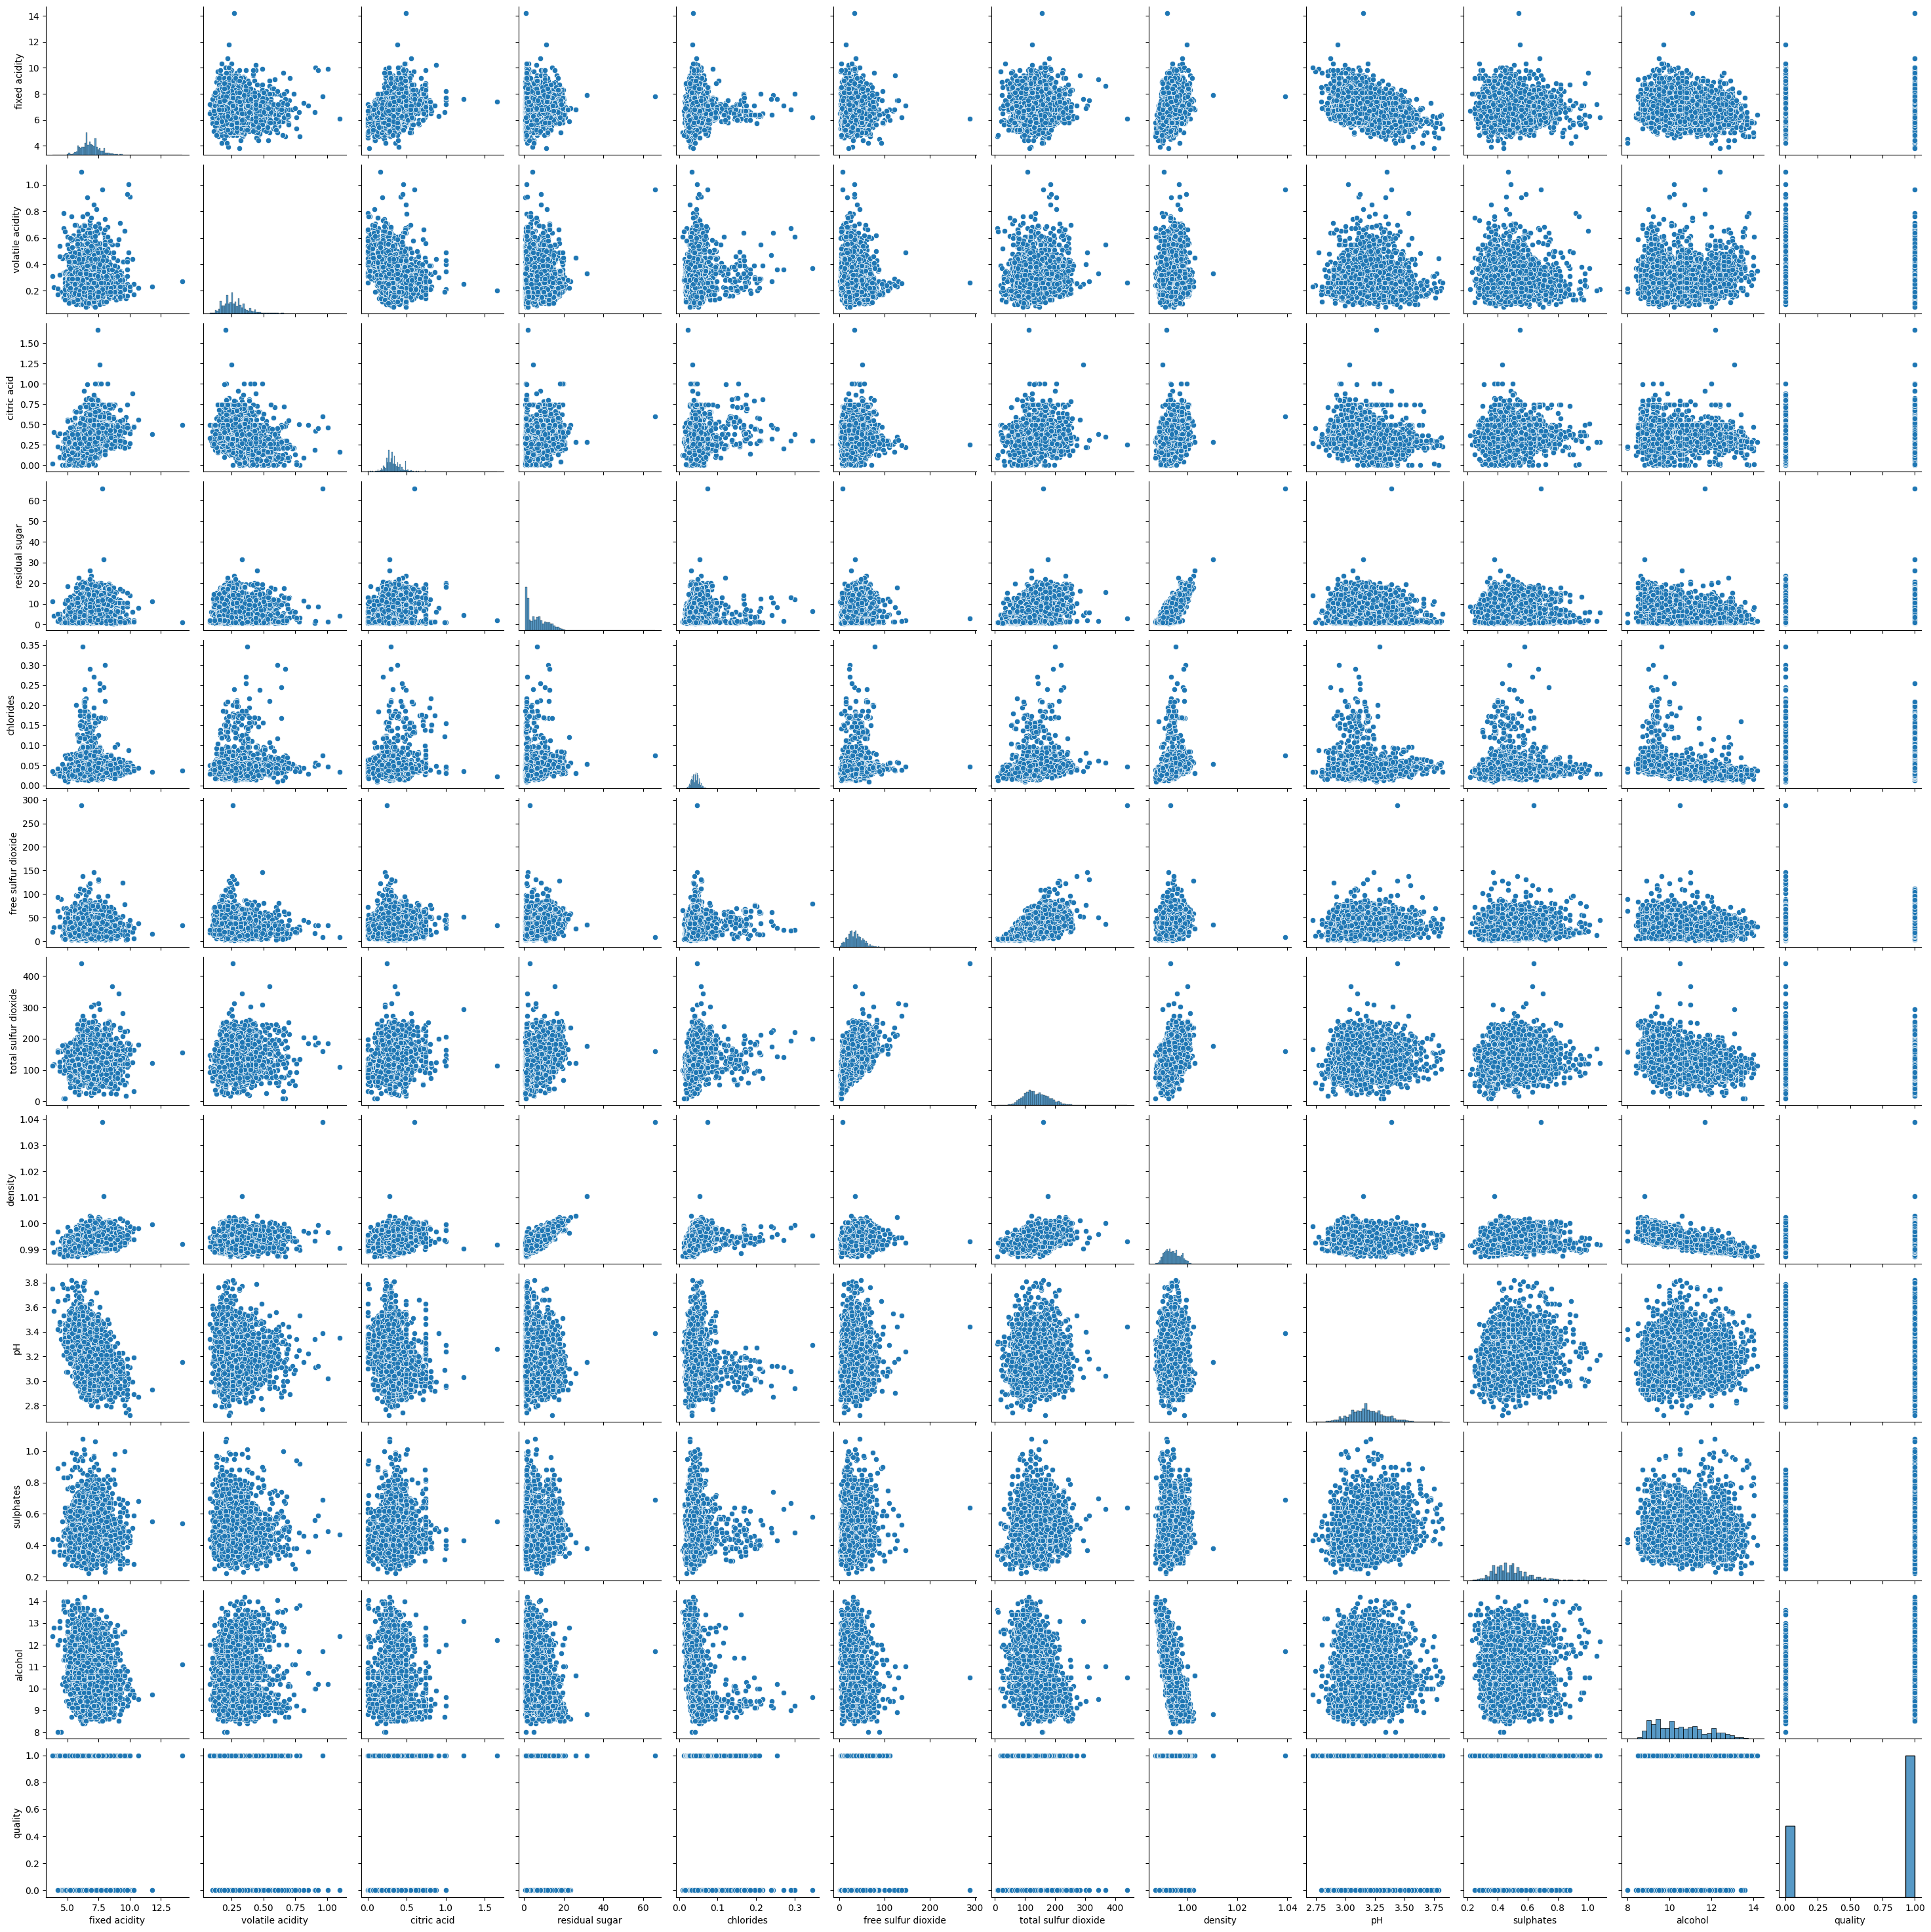

In [30]:
import seaborn as sns

#Generate pair plots using the seaborn package to analyze and drop the redundant features
sns.pairplot(shuffled_df)
plt.show()

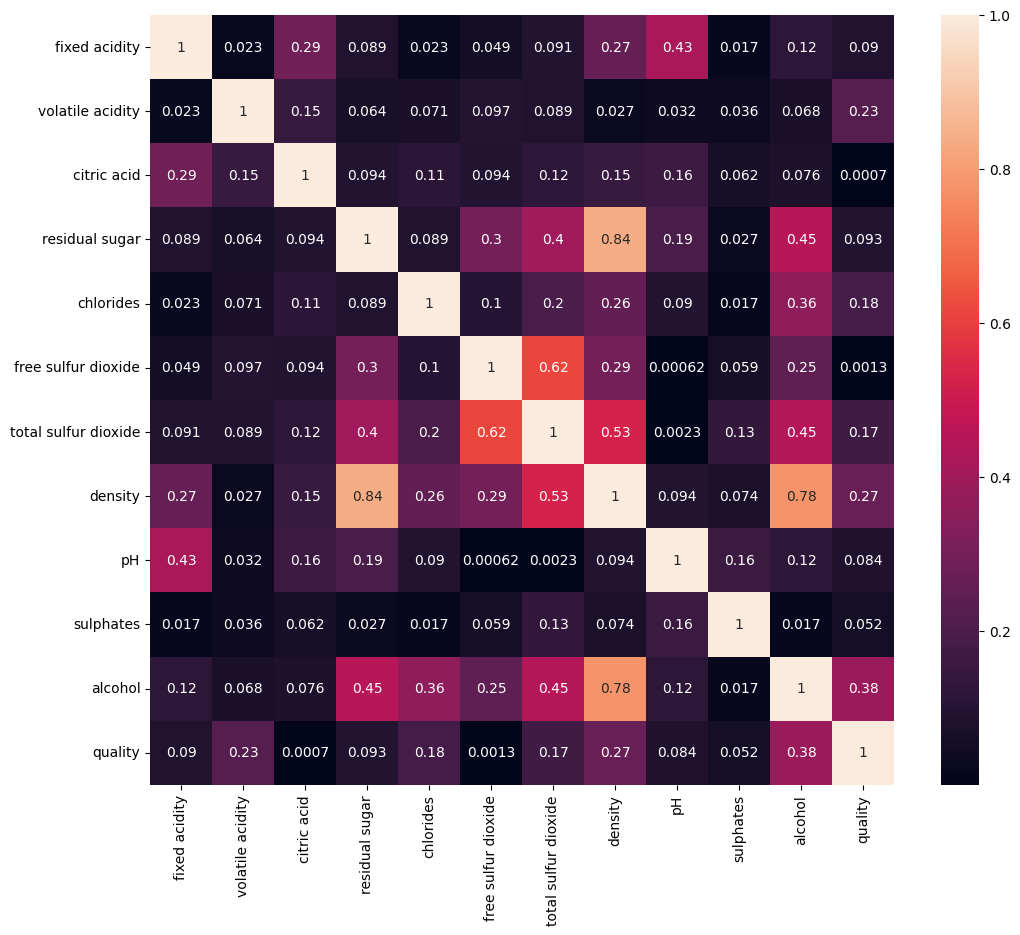

In [31]:
#Based on the plots, I identified that the plots residual sugar vs density and density vs alcohol has
#a strong correlation, so it is necessary to drop one of these features. Since density appears twice, we can drop density.


#This heatmap shows the correlation between the features and shows that our analysis wasn't wrong.
cor = shuffled_df.corr().abs()
plt.figure(figsize=(12, 10))
sns.heatmap(cor, annot=True)
plt.show()

In [32]:
#Drops the feature 'density' and creates a new 'cleaned' Dataframe
df_cleaned = shuffled_df.drop(columns=['density'])

### Split data into training and test set

In [33]:
def partition(X,Y,t):
    """
    Splits the input feature matrix and target vector into training and test sets based on a given partition ratio.

    Parameters:
    X : ndarray
        A numpy array with rows representing data samples and columns representing features.
    Y : ndarray
        A 1D numpy array with labels corresponding to each row of the feature matrix X.
    t : float
        The partition ratio determining the size of the training set. For example, if t=0.8,
        80% of the data will be used for training and 20% for testing.

    Returns:
    X_train : ndarray
        The feature matrix for the training set.
    X_test : ndarray
        The feature matrix for the test set.
    Y_train : ndarray
        The target vector for the training set.
    Y_test : ndarray
        The target vector for the test set.
    """
    # Calculate the index to split the data based on the partition ratio
    split_index = int(len(X) * t)

    # Split the feature matrix into training and test sets
    X_train, X_test = X[:split_index], X[split_index:]

    # Split the target vector into training and test sets
    Y_train, Y_test = Y[:split_index], Y[split_index:]

    return X_train, X_test, Y_train, Y_test

### Run Naive K-NN

In [34]:
#Getting the data to be partitioned
X = df_cleaned.drop(columns=['quality']).values
Y = df_cleaned['quality'].values
X_train, X_test, Y_train, Y_test = partition(X, Y, 0.8)

#Running the class model with uniform weight, and k=5
knn = KNN_Classifier()
knn.fit(X_train, Y_train, n_neighbors=5, weights='uniform')
predictions_naive = knn.predict(X_test)

#Calculating the accuracy and F1 score for these prediction results
accuracy_naive = accuracy_generalization_error(predictions_naive, Y_test)[0]
f1_naive = f1_score(predictions_naive, Y_test)

In [35]:
def standardize(X):
    """
    Standardizes the input feature matrix by subtracting the mean and dividing by the standard deviation
    for each feature.

    Parameters:
    X : ndarray
        A numpy array with rows representing data samples and columns representing features.

    Returns:
    standardized_X : ndarray
        The standardized feature matrix where each feature has a mean of 0 and standard deviation of 1.
    means : ndarray
        An array containing the mean value for each feature before standardization.
    stds : ndarray
        An array containing the standard deviation for each feature before standardization.
    """
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    return (X - means) / stds, means, stds

#standarizing the training and testing data
X_train_std, means, stds = standardize(X_train)
X_test_std = (X_test - means) / stds


In [36]:
'''
Compares the naive approach with the standarized data approach and prints the values.
'''

knn.fit(X_train_std, Y_train, n_neighbors=5, weights='uniform')
predictions_std = knn.predict(X_test_std)

accuracy_std = accuracy_generalization_error(predictions_std, Y_test)[0]
f1_std = f1_score(predictions_std, Y_test)

# Compare accuracy
print("Accuracy Comparison:")
print("Naive Approach:", accuracy_naive)
print("Standardized Approach:", accuracy_std)

# Compare F1 score
print("\nF1 Score Comparison:")
print("Naive Approach:", f1_naive)
print("Standardized Approach:", f1_std)

Accuracy Comparison:
Naive Approach: 0.6683673469387755
Standardized Approach: 0.7428571428571429

F1 Score Comparison:
Naive Approach: 0.7594374537379718
Standardized Approach: 0.8085106382978724


In [37]:
'''
Compares the uniform measures vs the weighted measures in the model, and prints the values.
'''

knn.fit(X_train_std, Y_train, n_neighbors=5, weights='distance')
predictions_weighted_std = knn.predict(X_test_std)

accuracy_weighted_std = accuracy_generalization_error(predictions_weighted_std, Y_test)[0]
f1_weighted_std = f1_score(predictions_weighted_std, Y_test)

print("Accuracy Comparison:")
print("Uniform:", accuracy_std)
print("Distance:", accuracy_weighted_std)

print("\nF1 Score Comparison:")
print("Uniform:", f1_std)
print("Distance:", f1_weighted_std)

Accuracy Comparison:
Uniform: 0.7428571428571429
Distance: 0.676530612244898

F1 Score Comparison:
Uniform: 0.8085106382978724
Distance: 0.740801308258381


## Part C

In [ ]:
'''
Evaluates the model for all the parameters combinations,
and prints the performance measures for each performance function.
'''

k_values = [1, 5, 9, 11]
weights_options = ['uniform', 'distance']

for k in k_values:
  for weights in weights_options:
    knn = KNN_Classifier()
    knn.fit(X_train_std, Y_train, n_neighbors=k, weights=weights)
    predictions = knn.predict(X_test_std)

    acc = accuracy_generalization_error(predictions, Y_test)[0]
    g_error = accuracy_generalization_error(predictions, Y_test)[1]
    f1 = f1_score(predictions, Y_test)
    precision_test = precision(predictions, Y_test)
    recall_test = recall(predictions, Y_test)
    conf_matrix_test = confusion_matrix(predictions, Y_test)

    #print(f"K={k}, Distance Metric= Euclidean, Weights={weights}:")
    print(f"K={k}, Distance Metric= Manhattan, Weights={weights}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Generalization Error: {g_error:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"Recall: {recall_test:.4f}")
    print(f"Confusion Matrix: {conf_matrix_test}")